### Suppress warnings

In [1]:
import warnings
warnings.filterwarnings(action="ignore")

### Import libraries

In [2]:
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# importing the required libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics
import os

### Checking Version libraries

In [3]:
f'NumPy version: {np.__version__} | Pandas version: {pd.__version__} | Seaborn version: {sns.__version__}'

'NumPy version: 1.20.1 | Pandas version: 1.2.4 | Seaborn version: 0.11.1'

### Importing Dataset and EDA

Data set name Train is saved as __House__ assignment.

In [4]:
house = pd.read_csv('C:/Users/dell/Desktop/train.csv') #importing dataset
print(house.shape) # check shape/size of data sheet
house.head() # overvirew of dataset

(1460, 81)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

### Checking for duplicate entries in dataset

In [5]:
house[house.duplicated()]

Empty DataFrame
Columns: [Id, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition, SalePrice]
Index: []

- No dulplicate Entry observed

### Checking percentage of null values in dataset columns

In [6]:
house[house.columns[house.isnull().any()]].isnull().sum() * 100 / house.shape[0]

LotFrontage     17.739726
Alley           93.767123
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtFinType2     2.602740
Electrical       0.068493
FireplaceQu     47.260274
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
PoolQC          99.520548
Fence           80.753425
MiscFeature     96.301370
dtype: float64

#### Checking outlier in the numerical columns

In [7]:
house.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466   
std     161.319273   441.866955   438.705324   386.587738   436.528436   
min       0.000000     0.000000     0.000000   334.000000     0.000000   
25%       0.000000   223.000000   795.750000   882.000000     0.000000   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000   
90%     117.200000  1232.000000  1602.200000  1680.000000   954.200000   
95%     396.200000  1468.000000  1753.000000  1831.250000  1141.050000   
99%     830.380000  1797.050000  2155.050000  2219.460000  1418.920000   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000   

       LowQualFinSF    GrLivArea  BsmtFullBath  BsmtHalfBath     FullBath  \
count   1460.000000  1460.000000   1460.000000   1460.000000  1460.000000   
mean       5.844521  1515.463699      0.425342      0.057534     1.565068   
std       48.623081   525.480383      0.518911      0.238753     0.550916   
min        0.000000   334.000000      0.000000      0.000000     0.000000   
25%        0.000000  1129.500000      0.000000      0.000000     1.000000   
50%        0.000000  1464.000000      0.000000      0.000000     2.000000   
75%        0.000000  1776.750000      1.000000      0.000000     2.000000   
90%        0.000000  2158.300000      1.000000      0.000000     2.000000   
95%        0.000000  2466.100000      1.000000      1.000000     2.000000   
99%      360.000000  3123.480000      2.000000      1.000000     3.000000   
max      572.000000  5642.000000      3.000000      2.000000     3.000000   

          HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd   Fireplaces  \
count  1460.000000   1460.000000   1460.000000   1460.000000  1460.000000   
mean      0.382877      2.866438      1.046575      6.517808     0.613014   
std       0.502885      0.815778      0.220338      1.625393     0.644666   
min       0.000000      0.000000      0.000000      2.000000     0.000000   
25%

### Outlier removal Method

In [8]:
def remove_outliers(x,y):
    q1 = x[y].quantile(0.25)
    q3 = x[y].quantile(0.75)
    value = q3-q1
    lower_value  = q1-1.5*value
    higer_value = q3+1.5*value
    out= x[(x[y]<higer_value) & (x[y]>lower_value)]
    return out

### Grouping columns with higher null values

In [9]:
house.columns[house.isnull().any()] 
null = house.isnull().sum()/len(house)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

### As per dict given in assignment these columns indicates missing facility, which could bring change in house price. So first replace missing values in catagorical columns with none.

In [10]:
null_values_affecting_house_price = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_values_affecting_house_price:
    house[i].fillna("none", inplace=True)

### Checking null values again

In [11]:
house.columns[house.isnull().any()] 
null_2 = house.isnull().sum()/len(house)*100
null_2 = null_2[null_2>0]
null_2.sort_values(inplace=True, ascending=False)
null_2

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

### Checking columns one by one

In [12]:
print(house['LotFrontage'].describe())
print(house['GarageYrBlt'].describe())
print(house['MasVnrArea'].describe())
print(house['Electrical'].describe())

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


### As per dict given in assignment "LotFrontage" relation with connected property is linear. So as it is numaric and having nice distribution it's values can be replaced with  'Neighborhood' values

In [13]:
house['LotFrontage'] = house.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
house["GarageYrBlt"].fillna(house["GarageYrBlt"].median(), inplace=True)
house["MasVnrArea"].fillna(house["MasVnrArea"].median(), inplace=True)
house["Electrical"].dropna(inplace=True)

### Rechecking distribution of columns

In [14]:
print(house['LotFrontage'].describe())
print(house['GarageYrBlt'].describe())
print(house['MasVnrArea'].describe())
print(house['Electrical'].describe())

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64
count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64
count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object


- Checking neumaric values in Dataset

In [15]:
numarical_variable = house.select_dtypes(include=['float64', 'int64'])
print(numarical_variable.shape)
numarical_variable.head()

(1460, 38)


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          2003       196.0         706           0        150          856   
1          1976         0.0         978           0        284         1262   
2          2002       162.0         486           0        434          920   
3          1970         0.0         216           0        540          756   
4          2000       350.0         655           0        490         1145   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0       856       854             0       1710             1             0   
1      1262         0             0       1262             0             1   
2       920       866             0       1786             1             0   
3       961       756             0       1717             1             0   
4      1145      1053             0       2198             1             0   

   FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  \
0         2         1             3             1             8           0   
1         2         0             3             1             6           1   
2         2         1             3             1             6           1   
3         1         0             3             1             7           1   
4         2         1             4             1             9           1   

   GarageYrBlt  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0       2003.0           2         548           0           61   
1       1976.0           2         460         298            0   
2       2001.0           2         608           0           42   
3       1998.0           3         642           0           35   
4       2000.0           3         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

### Checking 'Sale Price' vs 'Neighborhood' and 'OverallQual'

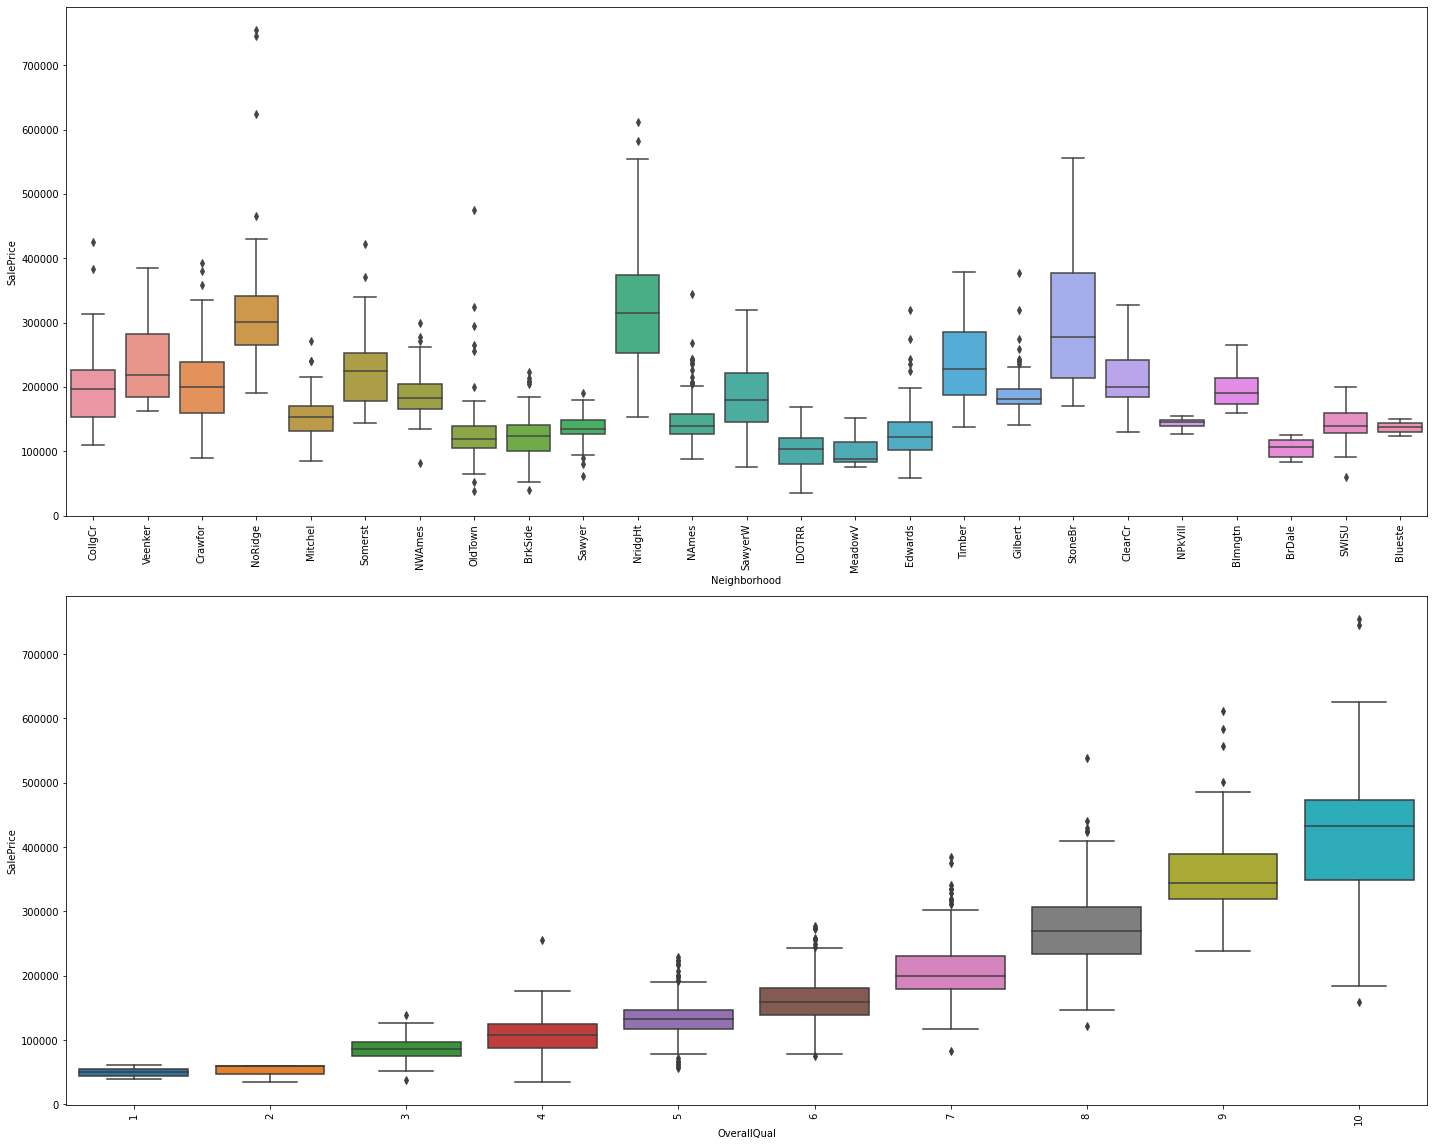

In [16]:
Sale_prise_comparision = ['Neighborhood','OverallQual']
plt.figure(figsize=(20,16))
for i in list(enumerate(Sale_prise_comparision)):
    plt.subplot(2,1,i[0]+1)
    sns.boxplot(x = i[1], y="SalePrice", data= house)
    plt.xticks(rotation = 90)
plt.tight_layout(pad = 1)    
plt.show()

- House sale price is increasing with increase in overall quality.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

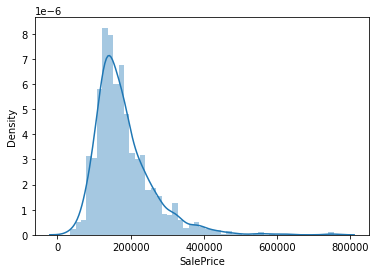

In [17]:
sns.distplot(house['SalePrice'])

### As it is clear that sale price is skewed left side. we could use log for normal distrribution.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

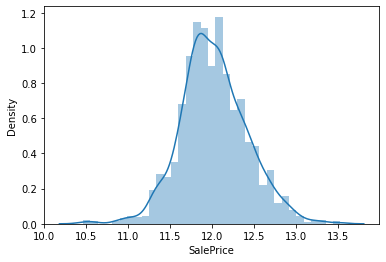

In [18]:
house['SalePrice']=np.log1p(house['SalePrice'])
sns.distplot(house['SalePrice'])

### Checkling correlation of numarical variables

In [19]:
correlation = numarical_variable.corr()
correlation

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.003381 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.370367 -0.139781     0.032628   
LotFrontage   -0.003381   -0.370367     1.000000  0.335957     0.239546   
LotArea       -0.033226   -0.139781     0.335957  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.239546  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.043595 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.120999  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.084550  0.013788     0.550684   
MasVnrArea    -0.051071    0.023573     0.195830  0.103321     0.407252   
BsmtFinSF1    -0.005024   -0.069836     0.232576  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.052237  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.119174 -0.002618     0.308159   
TotalBsmtSF   -0.015415   -0.238518     0.381038  0.260833     0.537808   
1stFlrSF       0.010496   -0.251758     0.434109  0.299475     0.476224   
2ndFlrSF       0.005590    0.307886     0.075686  0.050986     0.295493   
LowQualFinSF  -0.044230    0.046474     0.031873  0.004779    -0.030429   
GrLivArea      0.008273    0.074853     0.385190  0.263116     0.593007   
BsmtFullBath   0.002289    0.003491     0.107226  0.158155     0.111098   
BsmtHalfBath  -0.020155   -0.002333     0.006620  0.048046    -0.040150   
FullBath       0.005587    0.131608     0.186561  0.126031     0.550600   
HalfBath       0.006784    0.177354     0.054190  0.014259     0.273458   
BedroomAbvGr   0.037719   -0.023438     0.245232  0.119690     0.101676   
KitchenAbvGr   0.002951    0.281721    -0.005627 -0.017784    -0.183882   
TotRmsAbvGrd   0.027239    0.040380     0.332619  0.190015     0.427452   
Fireplaces    -0.019772   -0.045569     0.249295  0.271364     0.396765   
GarageYrBlt   -0.000122    0.081396     0.062380 -0.025865     0.514231   
GarageCars     0.016570   -0.040110     0.281393  0.154871     0.600671   
GarageArea     0.017634   -0.098672     0.339085  0.180403     0.562022   
WoodDeckSF    -0.029643   -0.012579     0.088736  0.171698     0.238923   
OpenPorchSF   -0.000477   -0.006100     0.141734  0.084774     0.308819   
EnclosedPorch  0.002889   -0.012037     0.008057 -0.018340    -0.113937   
3SsnPorch     -0.046635   -0.043825     0.064654  0.020423     0.030371   
ScreenPorch    0.001330   -0.026030     0.041063  0.043160     0.064886   
PoolArea       0.057044    0.008283     0.174567  0.077672     0.065166   
MiscVal       -0.006242   -0.007683     0.005332  0.038068    -0.031406   
MoSold         0.021172   -0.013585     0.007370  0.001205     0.070815   
YrSold         0.000712   -0.021407     0.004756 -0.014261    -0.027347   
SalePrice     -0.021917   -0.084284     0.349876  0.263843     0.790982   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.012609  -0.012713     -0.021998   -0.051071   -0.005024   
MSSubClass       -0.059316   0.027850      0.040581    0.023573   -0.069836   
LotFrontage      -0.043595   0.120999      0.084550    0.195830    0.232576   
LotArea          -0.005636   0.014228      0.013788    0.103321    0.214103   
OverallQual      -0.091932   0.572323      0.550684    0.407252    0.239666   
OverallCond       1.000000  -0.375983      0.073741   -0.125694   -0.046231   
YearBuilt        -0.375983   1.000000      0.592855    0.311600    0.249503   
YearRemodAdd      0.073741   0.592855      1.000000    0.176529    0.128451   
MasVnrArea       -0.125694   0.311600      0.176529    1.000000    0.261256   
BsmtFinSF1       -0.046231   0.249503      0.128451    0.261256    1.000000   
BsmtFinSF2        0.040229  -0.049107     -0.067759   -0.071330   -0.050117   
BsmtUnfSF        -0.136841   0.149040      0.181133    0.113862   -0.495251   
TotalBsmtSF      -0.171098   0.391452      0.291066    0.360067    0

### Plotting heatmap of numarical variables

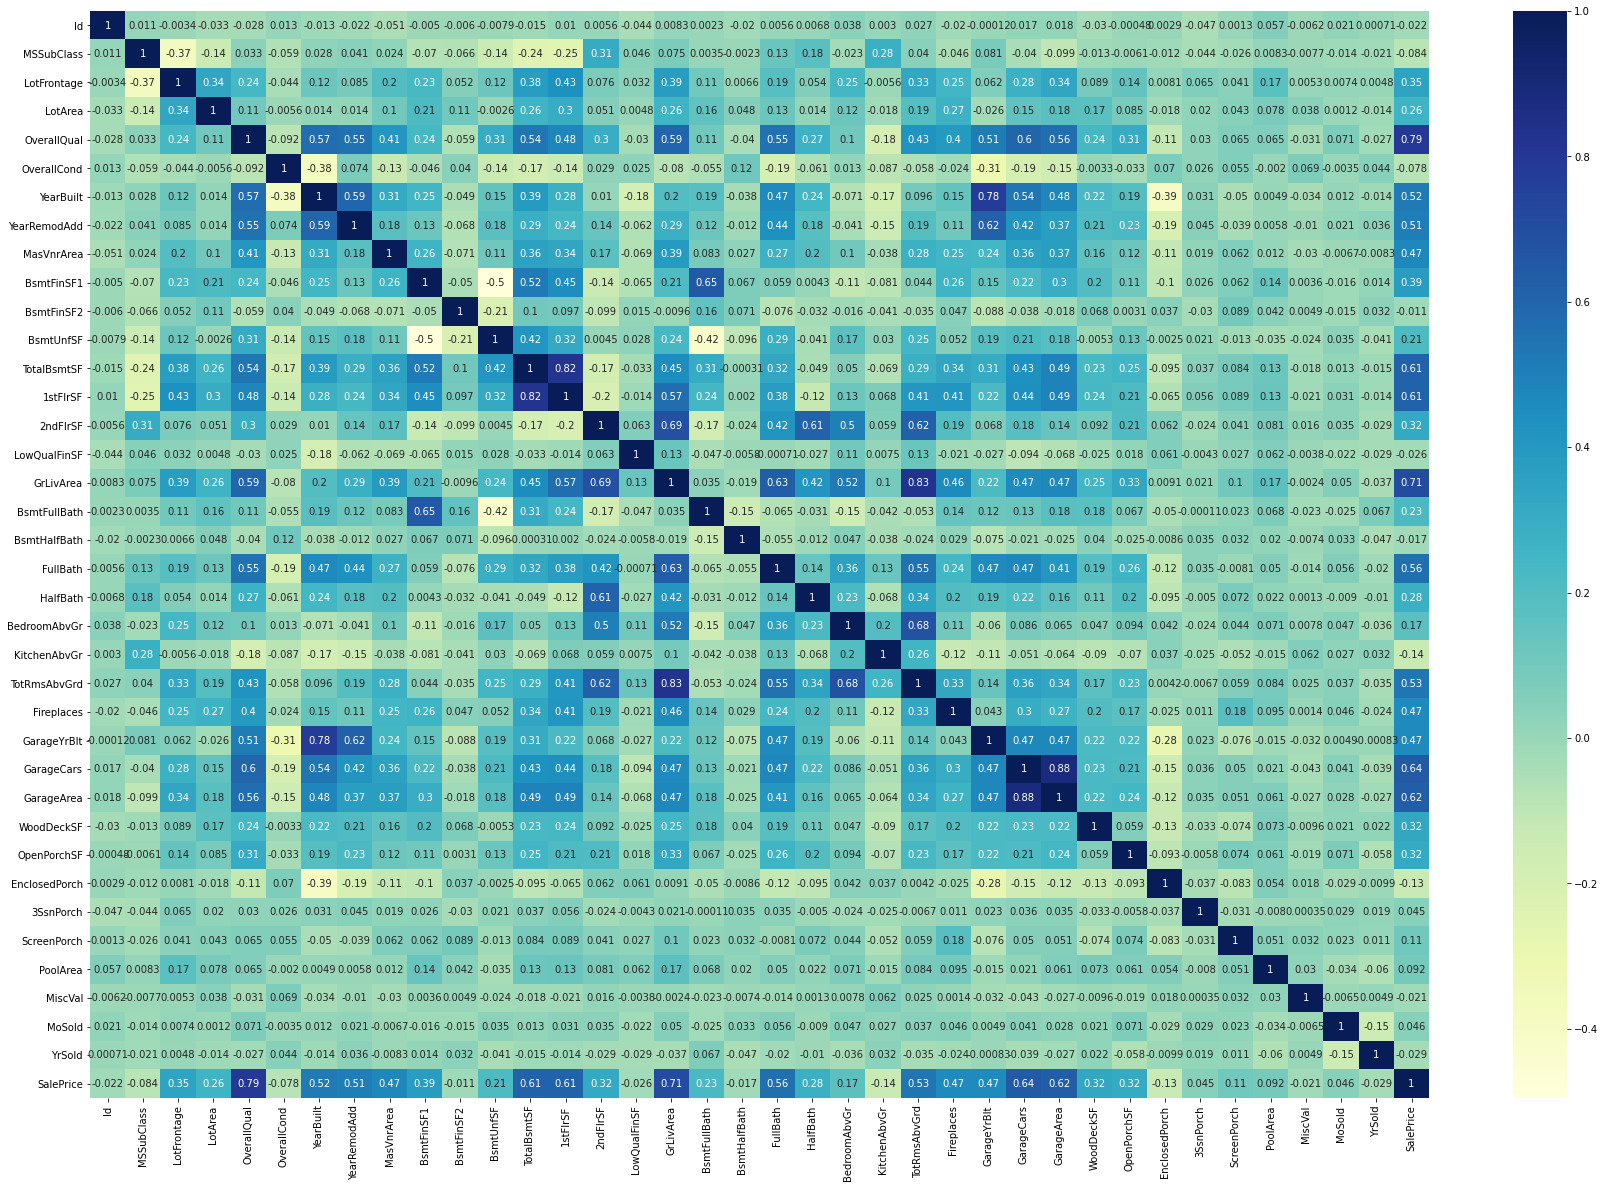

In [20]:
plt.figure(figsize=(30,20))# to mention plot size
sns.heatmap(correlation, cmap="YlGnBu", annot=True) # to plot heatmap
plt.show()

- We can see few variables are highly correlated.
- Before dropping them lets confirm there prediction strength by pair plot

### running below cell command would take a while, have patience

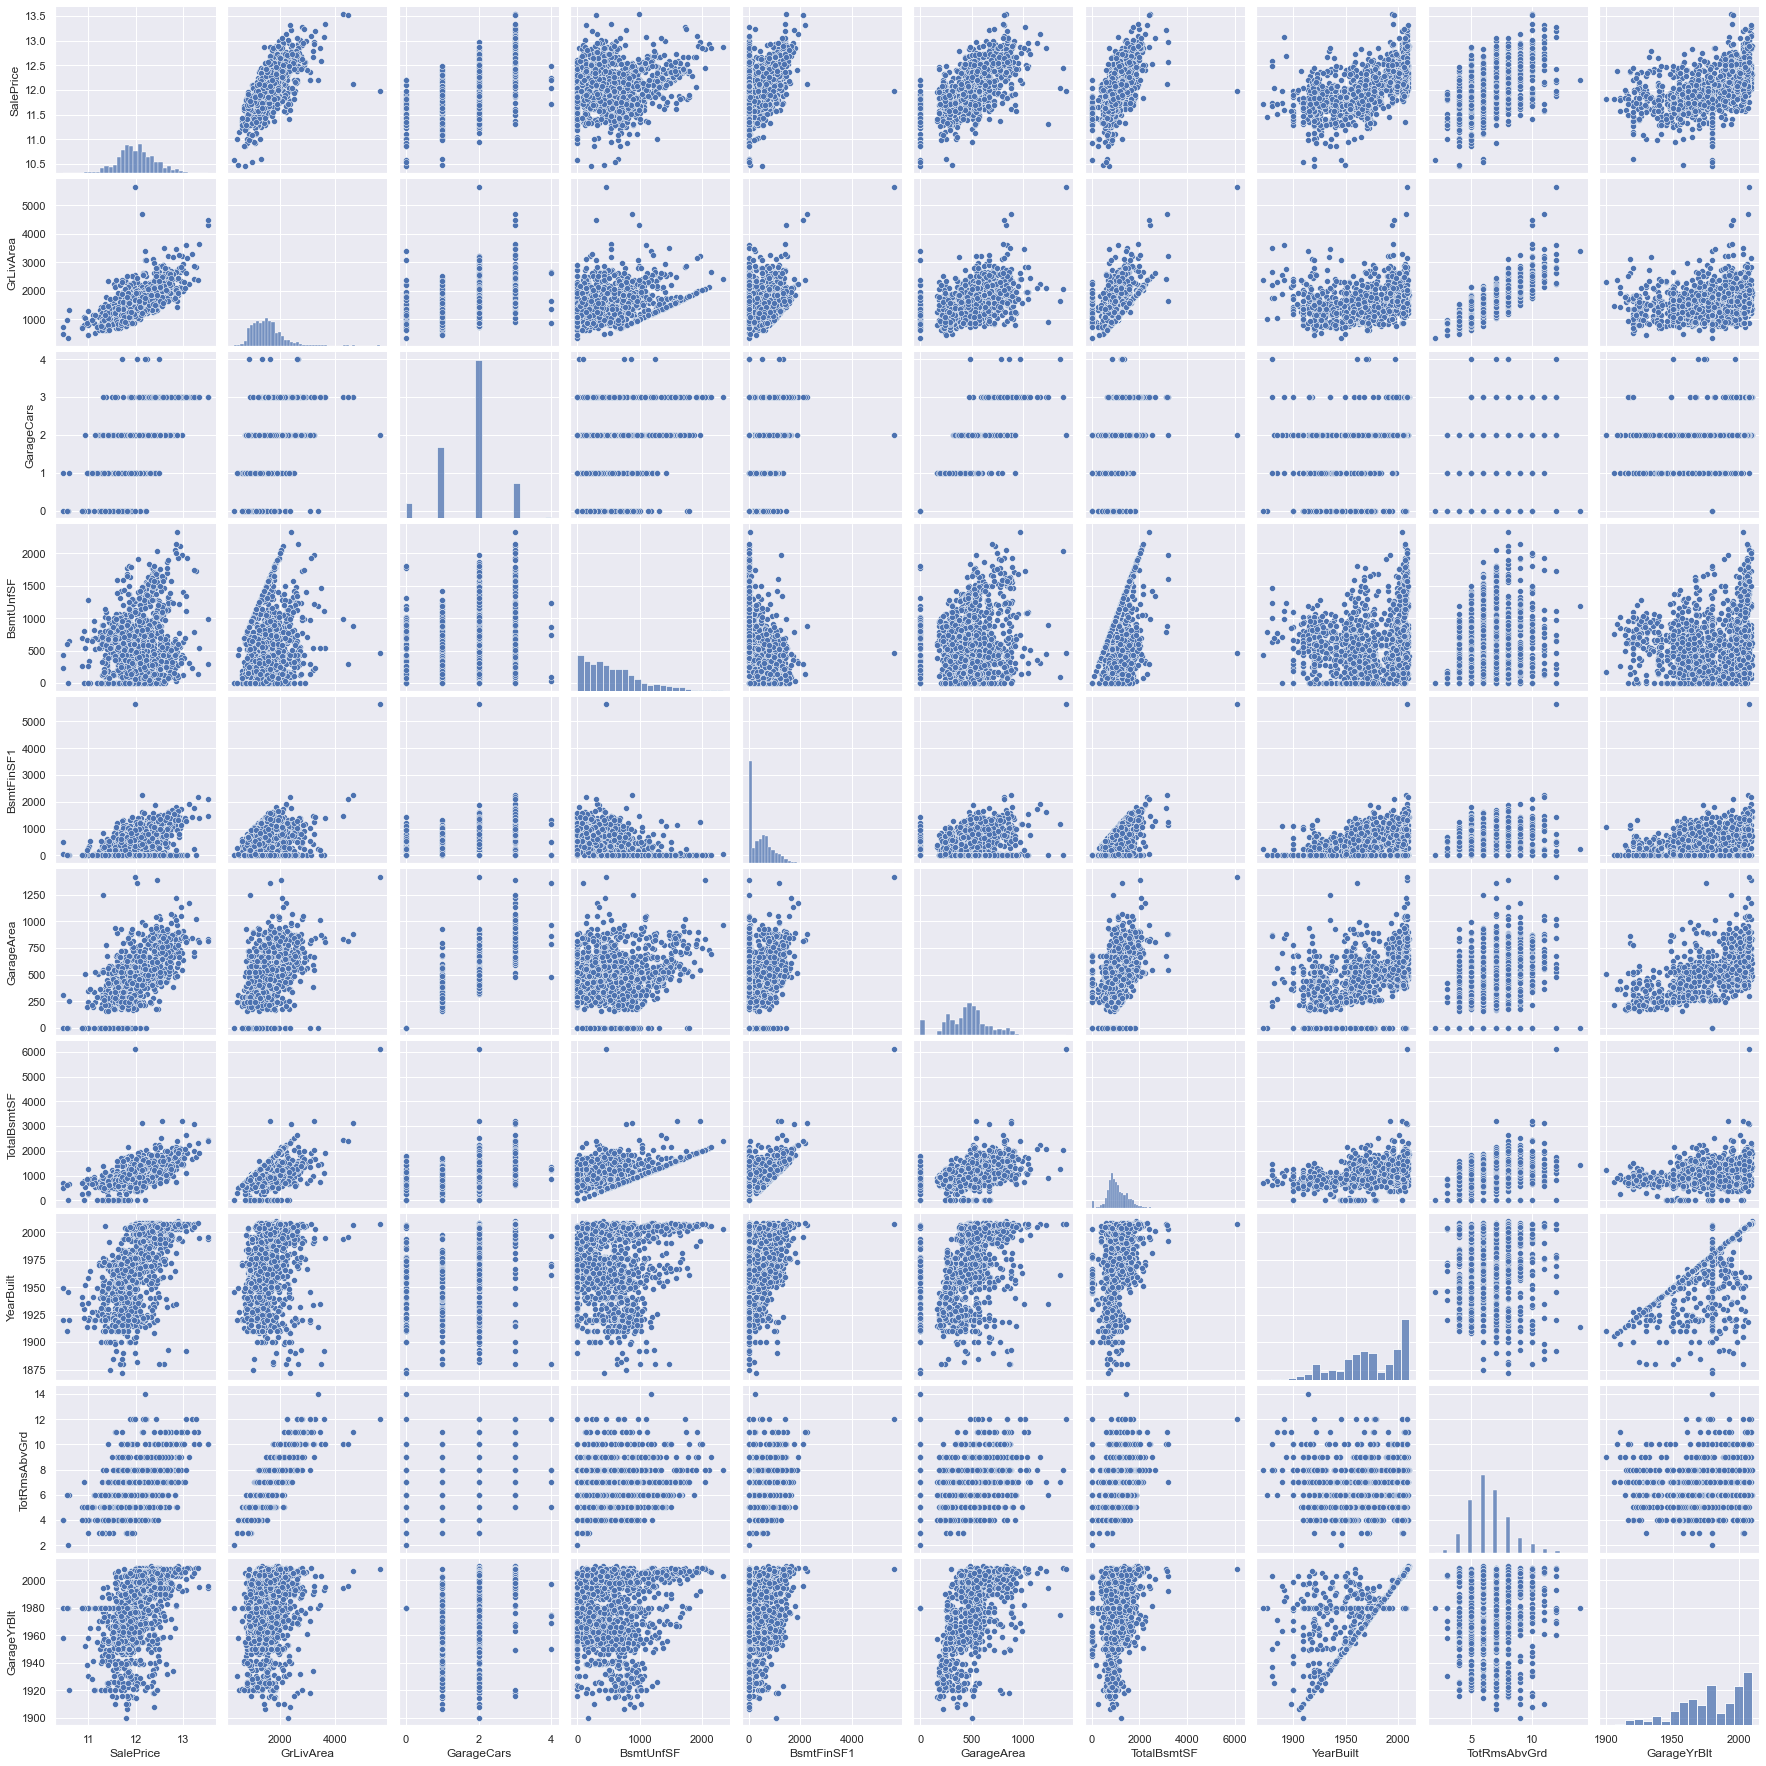

In [21]:
sns.set()
pairplot_cloumns = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(house[pairplot_cloumns], size = 2.5)
plt.show()

### it is better to drop columns which are highly correlated and not having good pridiction strength

In [22]:
print(house.shape)
columns_to_be_dropped = ['GarageCars','BsmtUnfSF','TotRmsAbvGrd','GarageYrBlt']
house.drop(axis=1,labels=columns_to_be_dropped,inplace=True)
house.shape

(1460, 81)


(1460, 77)

In [23]:
numarical_variable=house.select_dtypes(exclude=['object'])
print(len(numarical_variable.columns))
numarical_variable.head()

34


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  \
0          2003       196.0         706           0          856       856   
1          1976         0.0         978           0         1262      1262   
2          2002       162.0         486           0          920       920   
3          1970         0.0         216           0          756       961   
4          2000       350.0         655           0         1145      1145   

   2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0       854             0       1710             1             0         2   
1         0             0       1262             0             1         2   
2       866             0       1786             1             0         2   
3       756             0       1717             1             0         1   
4      1053             0       2198             1             0         2   

   HalfBath  BedroomAbvGr  KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  \
0         1             3             1           0         548           0   
1         0             3             1           1         460         298   
2         1             3             1           1         608           0   
3         0             3             1           1         642           0   
4         1             4             1           1         836         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008  12.247699  
1       5    2007  12.109016  
2       9    2008  12.317171  
3       2    2006  11.849405  
4      12    2008  12.429220

### Comparing few columns with sale price

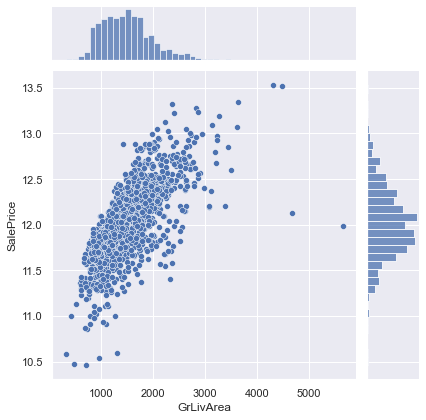

In [24]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=house)
plt.show()

(1429, 77)


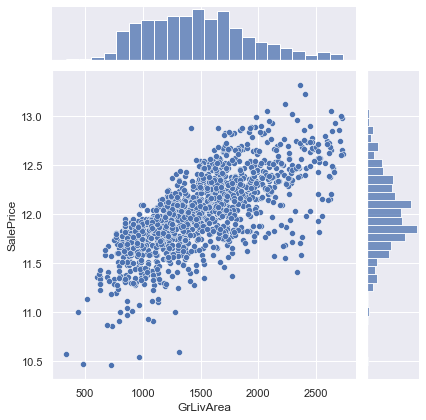

In [25]:
# plotting 'GrLivArea' vs 'SalePrice' after removing outlier
house = remove_outliers(house,'GrLivArea')
print(house.shape)
sns.jointplot(x = house['GrLivArea'], y = house['SalePrice'])
plt.show()

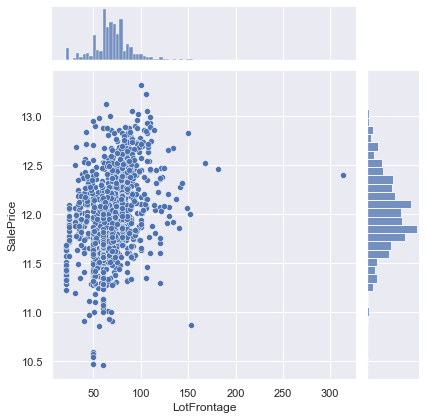

In [26]:
# LotFrontage vs SalePrice 
sns.jointplot(x = house['LotFrontage'], y = house['SalePrice'])
plt.show()

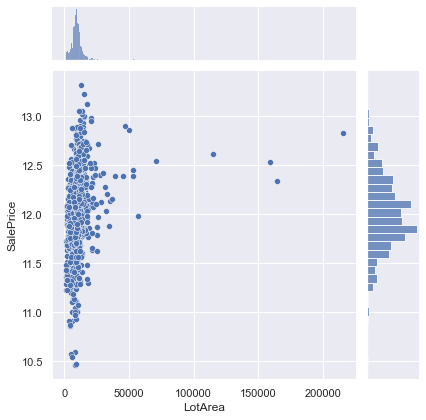

In [27]:
# LotArea vs SalePrice
sns.jointplot(x = house['LotArea'], y = house['SalePrice'])
plt.show()

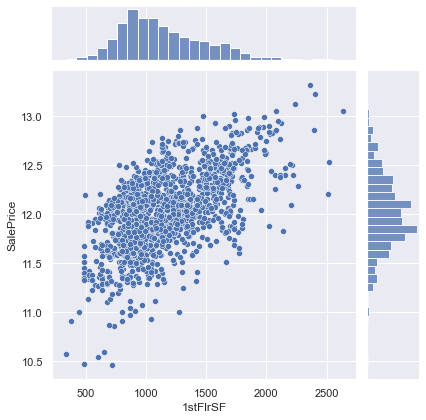

In [28]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = house['1stFlrSF'], y = house['SalePrice'])
plt.show()

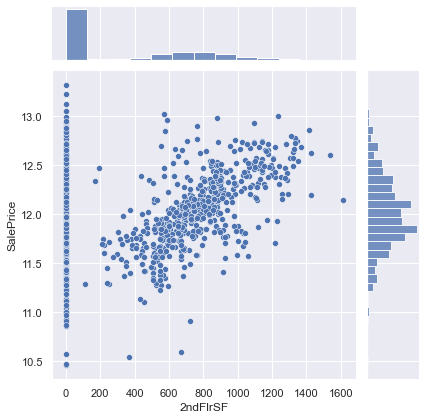

In [29]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = house['2ndFlrSF'], y = house['SalePrice'])
plt.show()

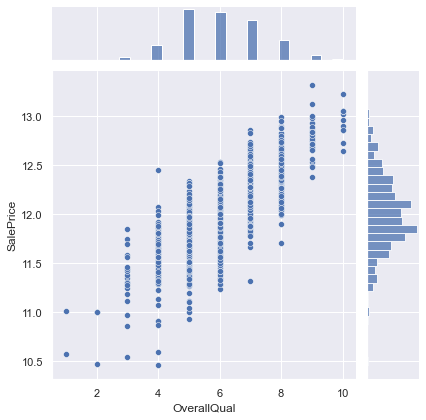

In [30]:
# OverallQual vs SalePrice
sns.jointplot(x = house['OverallQual'], y = house['SalePrice'])
plt.show()

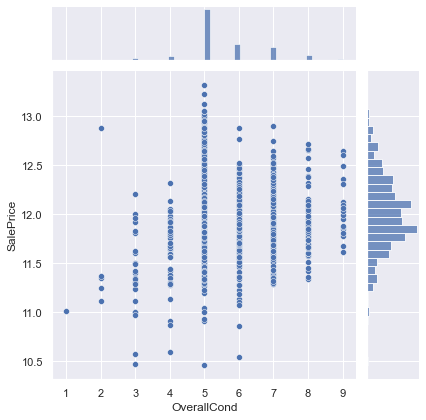

In [31]:
# OverallCond vs SalePrice
sns.jointplot(x=house['OverallCond'], y = house['SalePrice'])
plt.show()

#### Ground or First level houses i.e. '0' second floor Sq.Ft has also a steady increase

### As a part of feature engineering a new column can be drived with the name age of property

In [32]:
# age_of_property =   sale year of perperty - year of property built
print(house.shape)
house['age_of_property'] = (house['YrSold'] - house['YearBuilt'])
print(house.shape)
house.head()

(1429, 77)
(1429, 78)


Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  TotalBsmtSF Heating  \
0          GLQ         706          Unf           0          856    GasA   
1          ALQ         978          Unf           0         1262    GasA   
2          GLQ         486          Unf           0          920    GasA   
3          ALQ         216          Unf           0          756    GasA   
4          GLQ         655          Unf           0         1145    GasA   

  HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0        Ex          Y      SBrkr       856       854             0   
1        Ex          Y      SBrkr      1262         0             0   
2        Ex          Y      SBrkr       920       866             0   
3        Gd          Y      SBrkr       961       756             0   
4        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual Functional  Fireplaces FireplaceQu GarageType  \
0             1          Gd        Typ           0        none     Attchd   
1             1          TA        Typ           1          TA     Attchd   
2             1          Gd        Typ           1          TA     Attchd   
3             1          Gd        Typ           1          Gd     Detchd   
4             1          Gd        Typ  

### ploting age of perperty vs sale price

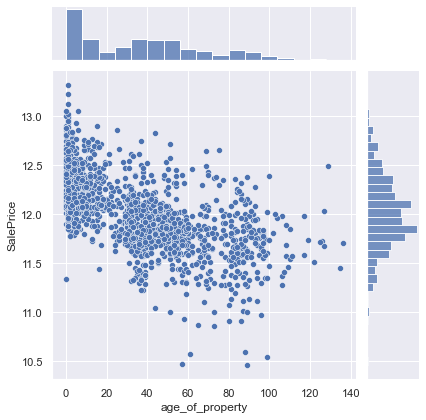

In [33]:
sns.jointplot(x = house['age_of_property'], y = house['SalePrice'])
plt.show()

### age of property and sale price are in inverse relation increase in age is going for decrease in price.

### Checking variance of columns 

In [34]:
# l1 = ['Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional']
columns_to_check_variance = house.select_dtypes(include=['float64', 'int64'])
print(len(columns_to_check_variance.columns))
columns_to_check_variance

35


Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
5        6          50         85.0    14115            5            5   
6        7          20         75.0    10084            8            5   
7        8          60         80.0    10382            7            6   
8        9          50         51.0     6120            7            5   
9       10         190         50.0     7420            5            6   
10      11          20         70.0    11200            5            5   
11      12          60         85.0    11924            9            5   
12      13          20         71.0    12968            5            6   
13      14          20         91.0    10652            7            5   
14      15          20         73.0    10920            6            5   
15      16          45         51.0     6120            7            8   
16      17          20         73.0    11241            6            7   
17      18          90         72.0    10791            4            5   
18      19          20         66.0    13695            5            5   
19      20          20         70.0     7560            5            6   
20      21          60        101.0    14215            8            5   
21      22          45         57.0     7449            7            7   
22      23          20         75.0     9742            8            5   
23      24         120         44.0     4224            5            7   
24      25          20         71.0     8246            5            8   
25      26          20        110.0    14230            8            5   
26      27          20         60.0     7200            5            7   
27      28          20         98.0    11478            8            5   
28      29          20         47.0    16321            5            6   
29      30          30         60.0     6324            4            6   
30      31          70         50.0     8500            4            4   
31      32          20         71.0     8544            5            6   
32      33          20         85.0    11049            8            5   
33      34          20         70.0    10552            5            5   
34      35         120         60.0     7313            9            5   
35      36          60        108.0    13418            8            5   
36      37          20        112.0    10859            5            5   
37      38          20         74.0     8532            5            6   
38      39          20         68.0     7922            5            7   
39      40          90         65.0     6040            4            5   
40      41          20         84.0     8658            6            5   
41      42          20        115.0    16905            5            6   
42      43          85         66.5     9180            5            7   
43      44          20         70.0     9200            5            6   
44      45          20         70.0     7945            5            6   
45      46         120         61.0     7658            9            5   
46      47          50         48.0    12822            7            5   
47      48          20         84.0    11096            8            5   
48      49         190         33.0     4456            4            5   
49      50          20         66.0     7742            5            7   
50      51          60         65.0    13869            6            6   
51      52          50         52.0     6240            6            6   
52      53          90        110.0     8472            5            5   
53      54  

In [35]:
for i in columns_to_check_variance:
    print(house[i].value_counts())

1       1
956     1
977     1
976     1
975     1
974     1
973     1
972     1
971     1
970     1
969     1
968     1
967     1
966     1
965     1
964     1
963     1
961     1
960     1
959     1
958     1
978     1
979     1
980     1
991     1
999     1
998     1
997     1
996     1
995     1
994     1
993     1
992     1
990     1
981     1
989     1
988     1
987     1
986     1
985     1
984     1
983     1
982     1
957     1
955     1
911     1
954     1
931     1
930     1
929     1
928     1
927     1
926     1
925     1
924     1
923     1
922     1
921     1
920     1
919     1
918     1
917     1
916     1
915     1
914     1
913     1
932     1
933     1
934     1
945     1
953     1
952     1
951     1
950     1
949     1
948     1
947     1
946     1
944     1
935     1
943     1
942     1
941     1
940     1
939     1
938     1
937     1
936     1
1000    1
1001    1
1002    1
1003    1
1069    1
1068    1
1067    1
1066    1
1065    1
1064    1
1063    1
1062    1


#### columns 'PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' are column with high null values, even after imputing. So it is better to drop these columns

In [36]:
print(house.Street.value_counts())
print(house.Utilities.value_counts())

Pave    1423
Grvl       6
Name: Street, dtype: int64
AllPub    1428
NoSeWa       1
Name: Utilities, dtype: int64


- Columns name 'Street' and 'Utilities' can be dropped and they show very low variance hence not helpful in price pridiction.
- column name 'MoSold','YrSold','YearBuilt','YearRemodAdd'  can be dropped as these are not be useful now

In [37]:
print(house.shape)
columns_to_be_dropped = ['Id','MoSold','YrSold','YearBuilt','YearRemodAdd','Street','Utilities',
                         'PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating',
                         'GarageCond', 'Fence', 'Functional']
house.drop(axis=1,labels=columns_to_be_dropped,inplace=True)
house.shape

(1429, 78)


(1429, 62)

### Data Prepration

In [38]:
#typecasting
#type of each feature in dataset: int, float, object
types = house.dtypes
#numerical values are either type int or float
numerical_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

object     33
int64      26
float64     3
Name: 0, dtype: int64

In [39]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numerical_type.index)
print(numerical_columns)
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'age_of_property']
['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


- converting catagorical variables to numarical variable with dummy variable

In [40]:
house = pd.get_dummies(house, drop_first=True )
print(house.shape)
house.head()

(1429, 211)


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  SalePrice  \
0              0          0            0         0  12.247699   
1              0          0            0         0  12.109016   
2              0          0            0         0  12.317171   
3            272          0            0         0  11.849405   
4              0          0            0         0  12.429220   

   age_of_property  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                5            0            0            1            0   
1               31            0            0            1            0   
2                7            0            0            1            0   
3               91            0            0            1            0   
4                8            0            0            1            0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   N

In [41]:
X = house.drop(['SalePrice'], axis=1)
print(X.shape)
X.head()

(1429, 210)


MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0         706           0          856       856       854             0   
1         978           0         1262      1262         0             0   
2         486           0          920       920       866             0   
3         216           0          756       961       756             0   
4         655           0         1145      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
0             1           0         548           0           61   
1             1           1         460         298            0   
2             1           1         608           0           42   
3             1           1         642           0           35   
4             1           1         836         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  age_of_property  \
0              0          0            0         0                5   
1              0          0            0         0               31   
2              0          0            0         0                7   
3            272          0            0         0               91   
4              0          0            0         0                8   

   MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
0            0            0            1            0             0   
1            0            0            1            0             0   
2            0            0            1            0             0   
3            0            0            1            0             0   
4            0            0            1            0             0   

   LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   
3             0             0                0                0   
4             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2                 1              0              0                     0   
3                 0              0              0                     0   
4                 0              0              0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \


In [42]:
# Y as target variable
y = house['SalePrice']
y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [43]:
# train and test dataset splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=30)

In [44]:
scaler = StandardScaler()
X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age_of_property']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age_of_property']])
X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age_of_property']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'age_of_property']])

In [45]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
194   -0.871162    -0.423631 -0.304795    -0.785685     1.319764   -0.566596   
159    0.062684     3.050484  0.886954     0.712285    -0.518347    2.045659   
143   -0.871162     0.421424  0.003450     0.712285    -0.518347    0.481743   
89    -0.871162    -0.423631 -0.217842    -1.534670    -0.518347   -0.566596   
420    0.763069     0.421424 -0.316519     0.712285    -0.518347    0.579130   

     BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
194   -0.088050   -0.290597    -0.428137 -0.774577 -0.789793     -0.110278   
159   -0.865845   -0.290597     0.890707  0.694058  1.808745     -0.110278   
143    0.586974   -0.290597     1.135492  0.997242 -0.789793     -0.110278   
89     0.374423   -0.290597    -0.113413 -0.424107 -0.789793     -0.110278   
420    2.058477   -0.290597     0.770812  0.560546 -0.789793     -0.110278   

     GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
194  -1.370724     -0.795105     -0.250541 -1.025897 -0.754318      0.198951   
159   2.230029      1.144176     -0.250541  0.863416  1.241233      1.482506   
143   0.064620      1.144176     -0.250541  0.863416 -0.754318      0.198951   
89   -1.086810      1.144176     -0.250541 -1.025897 -0.754318      0.198951   
420  -0.289146      3.083457     -0.250541  0.863416 -0.754318     -1.084604   

     KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
194     -0.224733   -0.962720   -0.540730   -0.743307    -0.705468   
159     -0.224733    0.595079    0.533279    1.189419     1.382136   
143     -0.224733   -0.962720    0.538073    0.421181    -0.246828   
89      -0.224733   -0.962720   -2.228457   -0.743307    -0.705468   
420      4.269932   -0.962720    1.530572   -0.743307    -0.705468   

     EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  age_of_property  \
194      -0.368494   -0.12652    -0.286259 -0.054574        -0.020596   
159      -0.368494    6.47247    -0.286259 -0.054574        -1.190820   
143      -0.368494   -0.12652    -0.286259 -0.054574        -0.889905   
89       -0.368494   -0.12652    -0.286259 -0.054574        -0.789600   
420      -0.368494   -0.12652    -0.286259 -0.054574        -0.856470   

     MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
194            0            0            1            0             0   
159            0            0            1            0             0   
143            0            0            1            0             0   
89             0            0            1            0             0   
420            0            0            0            1             0   

     LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
194             0             0                0                0   
159             0             0                1                0   
143             0             0                0                0   
89              0             1                0                0   
420             0             1                0                0   

     LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
194                1                  0              0              0   
159                0                  0              0              0   
143                1                  0              0              0   
89                 1                  0              0              0   
420                1                  0              0              0   

     LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
194                 1              0              0                     0   
159                 0              0              0                     0   
143                 1              0              0                     0   
89                  1              0              0                     0   
420                 1              0

In [46]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
1172    2.497557    -1.784779 -0.723597     0.677291    -0.515726   -0.606280   
241    -0.608101    -1.534167 -0.739110    -0.775499     3.010112   -0.606280   
477     0.108589     1.723791  0.372048     2.130081    -0.515726    4.318124   
1211   -0.130307     4.079545  0.195517     1.403686     1.247193   -0.606280   
677    -0.608101    -0.932698 -0.156865    -0.775499     2.128652   -0.606280   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  \
1172   -1.050226   -0.280865    -1.035789 -1.492055  0.696428     -0.098454   
241    -0.282394   -0.280865    -0.889574 -0.809283 -0.788241     -0.098454   
477    -1.050226   -0.280865     2.626789  2.598910  0.575279     -0.098454   
1211   -0.053678   -0.280865    -1.193990 -0.203004  0.808076     -0.098454   
677    -1.050226   -0.280865    -0.693022 -1.018931 -0.788241     -0.098454   

      GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
1172  -0.511787     -0.872765       -0.2163  0.844227  1.253957     -1.012286   
241   -1.340741     -0.872765       -0.2163 -1.013072 -0.738441     -1.012286   
477    2.495333     -0.872765       -0.2163  0.844227  1.253957      0.204159   
1211   0.571899     -0.872765       -0.2163  0.844227 -0.738441      1.420604   
677   -1.500488     -0.872765       -0.2163 -1.013072 -0.738441     -1.012286   

      KitchenAbvGr  Fireplaces  GarageArea  WoodDeckSF  OpenPorchSF  \
1172      -0.18205   -0.885237    0.713281   -0.754258     0.130540   
241       -0.18205   -0.885237   -2.252500   -0.284261    -0.066939   
477       -0.18205    0.730791    1.040703    2.600548     0.624236   
1211      -0.18205   -0.885237    0.082163    1.879346    -0.560635   
677       -0.18205   -0.885237   -1.113640    1.806415    -0.758113   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  age_of_property  \
1172      -0.352459  -0.109034    -0.233339       0.0        -1.134109   
241       -0.352459  -0.109034    -0.233339       0.0         0.853361   
477       -0.352459  -0.109034    -0.233339       0.0        -1.167233   
1211      -0.352459  -0.109034    -0.233339       0.0        -0.471619   
677        1.585653  -0.109034    -0.233339       0.0         1.615225   

      MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  LotShape_IR2  \
1172            1            0            0            0             0   
241             0            0            0            1             0   
477             0            0            1            0             0   
1211            0            0            1            0             0   
677             0            0            1            0             0   

      LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
1172             0             0                0                0   
241              0             1                0                0   
477              0             1                0                0   
1211             0             0                0                0   
677              0             1                0                0   

      LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
1172                1                  0              0              0   
241                 1                  0              0              0   
477                 1                  0              0              0   
1211                0                  0              0              0   
677                 1                  0              0              0   

      LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
1172                 1              0              0                     0   
241                  1              0              0                     0   
477                  1              0              0                     0   
1211                 1              1              0          

### Modelling

In [47]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(lm,30)            
rfe = rfe.fit(X_train, y_train)

In [48]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 128),
 ('LotFrontage', False, 163),
 ('LotArea', False, 78),
 ('OverallQual', False, 3),
 ('OverallCond', False, 38),
 ('MasVnrArea', False, 167),
 ('BsmtFinSF1', False, 107),
 ('BsmtFinSF2', False, 150),
 ('TotalBsmtSF', False, 37),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 22),
 ('GrLivArea', False, 21),
 ('BsmtFullBath', False, 86),
 ('BsmtHalfBath', False, 168),
 ('FullBath', False, 119),
 ('HalfBath', False, 115),
 ('BedroomAbvGr', False, 142),
 ('KitchenAbvGr', False, 165),
 ('Fireplaces', False, 123),
 ('GarageArea', False, 63),
 ('WoodDeckSF', False, 131),
 ('OpenPorchSF', False, 160),
 ('EnclosedPorch', False, 178),
 ('3SsnPorch', False, 136),
 ('ScreenPorch', False, 140),
 ('PoolArea', False, 126),
 ('age_of_property', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 81),
 ('LotShape_IR3', False, 83),
 ('LotShape_Reg', False, 108)

In [49]:
col = X_train.columns[rfe.support_]
print(col)
X_train.columns[~rfe.support_]

Index(['1stFlrSF', '2ndFlrSF', 'age_of_property', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV', 'Neighborhood_NridgHt',
       'Neighborhood_StoneBr', 'Neighborhood_Veenker', 'Condition1_RRAe',
       'BldgType_Duplex', 'BldgType_Twnhs', 'Exterior1st_ImStucc',
       'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone',
       'ExterQual_Fa', 'ExterCond_Po', 'Foundation_Stone', 'BsmtCond_Po',
       'BsmtCond_none', 'BsmtExposure_Gd', 'CentralAir_Y', 'Electrical_Mix',
       'GarageQual_Gd', 'GarageQual_TA'],
      dtype='object')


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'LowQualFinSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=180)

In [50]:
X_train_rfe = X_train[col]
print(X_train_rfe.shape)

(1000, 30)


In [51]:
X_train_rfe = sm.add_constant(X_train_rfe) #adding constant
lm = sm.OLS(y_train,X_train_rfe).fit() # Running the linear model

In [52]:
y_Pred = lm.predict(X_train_rfe)
print(r2_score(y_train, y_Pred))
RSS = np.sum(np.square(y_train-y_Pred))
print(RSS)
MSE = mean_squared_error(y_train, y_Pred)
print(MSE)
RMSE = (MSE*0.5)
print(RMSE)

0.868272505941356
18.905004005492103
0.018905004005492103
0.009452502002746051


Text(0.5, 0, 'Errors')

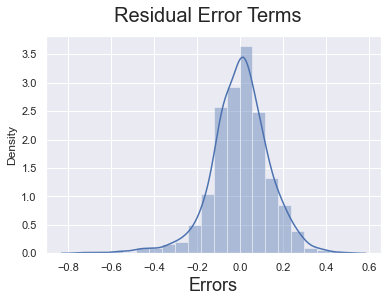

In [53]:
y_Pred = lm.predict(X_train_rfe)
res = y_train-y_Pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Residual Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

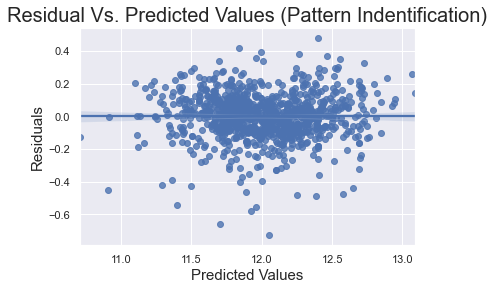

In [54]:
sns.regplot(x=y_Pred, y=res)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [55]:
X_train_new = X_train_rfe.drop(['const'], axis=1)
# Creating X_test_new dataframe by dropping variables from X_test using final trained column information
X_test_new = X_test[X_train_new.columns]
# Adding a constant variable to X_test_new dataset
X_test_new = sm.add_constant(X_test_new)

In [56]:
X_test_new

const  1stFlrSF  2ndFlrSF  age_of_property  MSZoning_FV  MSZoning_RH  \
1172    1.0 -1.492055  0.696428        -1.134109            1            0   
241     1.0 -0.809283 -0.788241         0.853361            0            0   
477     1.0  2.598910  0.575279        -1.167233            0            0   
1211    1.0 -0.203004  0.808076        -0.471619            0            0   
677     1.0 -1.018931 -0.788241         1.615225            0            0   
1183    1.0 -0.061350 -0.788241         1.648349            0            0   
640     1.0  1.037884 -0.788241        -1.034735            0            0   
876     1.0 -0.316327 -0.788241         0.257120            0            0   
55      1.0  0.774408 -0.788241         0.257120            0            0   
610     1.0  0.918895  0.819953        -0.902237            0            0   
212     1.0 -0.622300  1.397192        -1.200358            1            0   
628     1.0 -0.316327  1.682249         0.058373            0            0   
1010    1.0 -1.222913  0.520644         0.787112            0            0   
1417    1.0  0.448604  1.919796        -0.835988            0            0   
582     1.0 -0.950937 -0.788241        -0.637241            0            0   
517     1.0  0.355112  1.746387        -0.769739            0            0   
31      1.0  0.216291 -0.788241         0.190871            0            0   
1118    1.0 -0.370156  0.589532         0.455867            0            0   
872     1.0 -0.684628 -0.788241         0.621490            0            0   
1445    1.0 -0.676128 -0.788241         0.157747            0            0   
530     1.0  1.012386 -0.788241        -0.537868            0            0   
615     1.0 -0.276664 -0.788241         0.356494            0            0   
910     1.0 -0.132177  1.988685         0.455867            0            0   
1242    1.0  0.060472 -0.788241        -0.007876            0            0   
849     1.0 -0.163341  1.019492        -0.173498            0            0   
585     1.0  2.482754 -0.788241        -1.167233            0            0   
1069    1.0 -0.732790 -0.788241         0.720863            0            0   
360     1.0 -0.678961 -0.788241        -0.239747            0            0   
1443    1.0 -0.565638 -0.788241         1.880221            0            0   
338     1.0  1.329691 -0.788241        -0.471619            0            0   
655     1.0 -1.775363  0.558651         0.091498            0            0   
18      1.0 -0.106680 -0.788241        -1.067860            0            0   
1037    1.0 -0.273831  2.081328        -0.968486            0            0   
1229    1.0  1.006720 -0.788241         0.389618            0            0   
435     1.0 -0.919773  1.192902        -0.769739            0            0   
1218    1.0 -1.358900 -0.218128         0.753988            0            0   
1126    1.0  1.142708 -0.788241        -1.134109            0            0   
940     1.0  1.632831 -0.788241        -0.206623            0            0   
364     1.0 -1.024597  1.074128        -0.206623            0            0   
724     1.0  1.547838 -0.788241        -1.134109            0            0   
541     1.0 -0.438150  2.271366        -0.968486            0            0   
464     1.0 -0.316327 -0.788241        -0.173498            0            0   
837     1.0 -1.894352  0.408996        -0.041000            0            0   
844     1.0 -0.780952  0.494513         1.880221            0            0   
679     1.0 -0.463648 -0.788241         0.323369            0            0   
332     1.0  1.352356 -0.788241        -1.001611            0            0   
774     1.0  2.326935 -0.788241        -1.167233            0            0   
385     1.0  0.332448 -0.788241        -1.001611            0            0   
203     1.0 -0.860279 -0.788241        -1.067860            0            0   
334     1.0 -0.591136  0.862711        -0.869113            0            0   
160     1.0  0.227624 -0.788

In [57]:
y_pred = lm.predict(X_test_new)
r2=r2_score(y_test, y_pred)
round(r2,3)

0.819

### R2 score on train is 0.868 and for test set it is 0.819. it seems slight overfit. lets try other ways too

### LASSO Regularization

#### to get optimium value of alpha using GridSearchCV cross-valiation

In [58]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
folds = 5
lasso_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_cv.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [59]:
cv_results_l = pd.DataFrame(lasso_cv.cv_results_)
cv_results_l.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.135416      0.049187         0.008742        0.001465     0.00005   
1       0.221636      0.015852         0.010042        0.001342      0.0001   
2       0.041273      0.007238         0.007262        0.001079       0.001   
3       0.016094      0.002333         0.007709        0.002440       0.008   
4       0.019852      0.002608         0.005597        0.000485        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 5e-05}          -0.079161          -0.094881          -0.078522   
1  {'alpha': 0.0001}          -0.076309          -0.089126          -0.075866   
2   {'alpha': 0.001}          -0.078075          -0.084778          -0.075769   
3   {'alpha': 0.008}          -0.090093          -0.092668          -0.081988   
4    {'alpha': 0.01}          -0.091087          -0.093045          -0.083880   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.081820          -0.097771        -0.086431        0.008206   
1          -0.079195          -0.096104        -0.083320        0.007986   
2          -0.076506          -0.095983        -0.082222        0.007582   
3          -0.088667          -0.101301        -0.090943        0.006267   
4          -0.089983          -0.101405        -0.091880        0.005662   

   rank_test_score  split0_train_score  split1_train_score  \
0                3           -0.066005           -0.062783   
1                2           -0.066959           -0.064004   
2                1           -0.075870           -0.074615   
3                4           -0.089084           -0.088048   
4                5           -0.090187           -0.089204   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.066376           -0.065205           -0.061898   
1           -0.067449           -0.066409           -0.062738   
2           -0.076583           -0.076203           -0.071652   
3           -0.091252           -0.089736           -0.086373   
4           -0.092811           -0.091066           -0.087610   

   mean_train_score  std_train_score  
0         -0.064453         0.001788  
1         -0.065512         0.001823  
2         -0.074985         0.001793  
3         -0.088898         0.001635  
4         -0.090176         0.001747

In [60]:
# parameters using lasso:
print(lasso_cv.best_params_)
print(lasso_cv.best_score_)

{'alpha': 0.001}
-0.08222226423166215


**value of alpha for Lasso regression is 0.001**

In [61]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#checking R-squared value for Training set
y_train_pred = lasso.predict(X_train)
print("r2_score on train data for lasso:",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# checking R-squared value for test data set
y_test_pred = lasso.predict(X_test)
print("r2_score on test data for Lasso:",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

print("mean squared error:", mean_squared_error(y_test, y_test_pred))

r2_score on train data for lasso: 0.9198071885440342
r2_score on test data for Lasso: 0.9111603280187931
mean squared error: 0.01395072276424643


In [62]:
lasso.coef_

array([-0.00749628,  0.00721619,  0.01531348,  0.08314393,  0.05374671,
        0.00117618,  0.02468043,  0.        ,  0.04649954,  0.        ,
        0.00149084, -0.00781105,  0.12424114,  0.01852432,  0.        ,
        0.00796849,  0.00567142,  0.        , -0.01043059,  0.01548444,
        0.03126449,  0.00927167,  0.00095248,  0.00227088,  0.00279048,
        0.00848259,  0.00922011, -0.06666762,  0.05172321,  0.        ,
        0.04412622, -0.        ,  0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        ,  0.02725202, -0.        ,
       -0.        , -0.00411583, -0.        , -0.        ,  0.        ,
       -0.        ,  0.00678869,  0.        , -0.        ,  0.09182847,
       -0.01083177,  0.        , -0.        , -0.01087266, -0.00350291,
       -0.        ,  0.        , -0.        , -0.        ,  0.03080225,
       -0.        ,  0.        , -0.        , -0.        ,  0.01307325,
        0.04204078, -0.        ,  0.        ,  0.        ,  0.04

In [63]:
cv_results = pd.DataFrame(lasso_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
print(len(cv_results.columns))
cv_results

21


mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.135416      0.049187         0.008742        0.001465     0.00005   
1       0.221636      0.015852         0.010042        0.001342      0.0001   
2       0.041273      0.007238         0.007262        0.001079       0.001   
3       0.016094      0.002333         0.007709        0.002440       0.008   
4       0.019852      0.002608         0.005597        0.000485        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 5e-05}          -0.079161          -0.094881          -0.078522   
1  {'alpha': 0.0001}          -0.076309          -0.089126          -0.075866   
2   {'alpha': 0.001}          -0.078075          -0.084778          -0.075769   
3   {'alpha': 0.008}          -0.090093          -0.092668          -0.081988   
4    {'alpha': 0.01}          -0.091087          -0.093045          -0.083880   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0          -0.081820          -0.097771        -0.086431        0.008206   
1          -0.079195          -0.096104        -0.083320        0.007986   
2          -0.076506          -0.095983        -0.082222        0.007582   
3          -0.088667          -0.101301        -0.090943        0.006267   
4          -0.089983          -0.101405        -0.091880        0.005662   

   rank_test_score  split0_train_score  split1_train_score  \
0                3           -0.066005           -0.062783   
1                2           -0.066959           -0.064004   
2                1           -0.075870           -0.074615   
3                4           -0.089084           -0.088048   
4                5           -0.090187           -0.089204   

   split2_train_score  split3_train_score  split4_train_score  \
0           -0.066376           -0.065205           -0.061898   
1           -0.067449           -0.066409           -0.062738   
2           -0.076583           -0.076203           -0.071652   
3           -0.091252           -0.089736           -0.086373   
4           -0.092811           -0.091066           -0.087610   

   mean_train_score  std_train_score  
0         -0.064453         0.001788  
1         -0.065512         0.001823  
2         -0.074985         0.001793  
3         -0.088898         0.001635  
4         -0.090176         0.001747

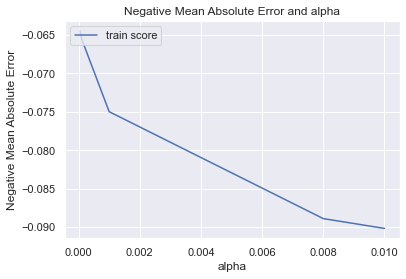

In [64]:
# checking mean test and train scores with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results_l['param_alpha'], cv_results_l['mean_train_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [65]:
model_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coeff = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coeff.columns = ['Feature','Coeff']

In [66]:
lasso_coeff.sort_values(by='Coeff',ascending=False).head(10)

Feature      Coeff
0              MSSubClass  11.775817
13           BsmtFullBath   0.124241
203          SaleType_Oth   0.093989
50   Neighborhood_Edwards   0.091828
4             OverallCond   0.083144
5              MasVnrArea   0.053747
166      Electrical_FuseF   0.053152
29            MSZoning_RH   0.051723
9                1stFlrSF   0.046500
31            MSZoning_RM   0.044126

**The above are the top 10 features selected by the Lasso regression model**

### Ridge Regression

In [67]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [68]:
# checking best hyperparameter i.e alpha
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 10.0}
-0.08129489760360595


**value of alpha for ridge regression is 10**

In [69]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01424991,  0.00627609,  0.0200714 ,  0.06680276,  0.05212774,
        0.00403847,  0.02141366,  0.00431362,  0.04323238,  0.03591079,
        0.0442287 , -0.00516336,  0.06963917,  0.01691005, -0.00131492,
        0.0124899 ,  0.0113017 ,  0.00645703, -0.00591953,  0.01317599,
        0.02795138,  0.00986482,  0.00256679,  0.00358501,  0.00513515,
        0.0089428 ,  0.01056573, -0.06045091,  0.05277148,  0.01850726,
        0.04866455,  0.00891799,  0.02863221,  0.00792282,  0.00582811,
        0.01135118, -0.02474821,  0.00396123,  0.03475838, -0.0271096 ,
       -0.0134832 , -0.01090657,  0.00417351, -0.0485943 ,  0.00146749,
       -0.03285109,  0.01274928,  0.00610935, -0.01065256,  0.09003795,
       -0.04080306, -0.00324926, -0.02986213, -0.06633924, -0.03476377,
       -0.01636323,  0.00591469, -0.02118279,  0.00264006,  0.04195889,
       -0.0096195 ,  0.01077196, -0.02287332, -0.00314872,  0.02943781,
        0.07207049, -0.01749483,  0.01784084,  0.01674566,  0.05

In [70]:
#checking the R-squared for training data set 
y_train_pred = ridge.predict(X_train)
print("train score for Ridge regression",metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

# checking on test data set
y_test_pred = ridge.predict(X_test)
print("Test score for Ridge regression",metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

# checking RMSE
print(mean_squared_error(y_test, y_test_pred))

train score for Ridge regression 0.9307409930817205
Test score for Ridge regression 0.9123439784851639
0.01376485107947024


**checking coefficients values in the form of a dataset** 

In [71]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
ridge_coeff = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coeff.columns = ['Feature','Coeff']

In [72]:
ridge_coeff.sort_values(by='Coeff',ascending=False).head(10)

Feature      Coeff
0              MSSubClass  11.793927
50   Neighborhood_Edwards   0.090038
66    Neighborhood_Timber   0.072070
13           BsmtFullBath   0.069639
4             OverallCond   0.066803
166      Electrical_FuseF   0.063713
70        Condition1_PosA   0.057686
29            MSZoning_RH   0.052771
5              MasVnrArea   0.052128
31            MSZoning_RM   0.048665

- Residual Analysis of the data from Lasso Model

We will now validate the assumptions of linear regression

Text(0.5, 0, 'Errors')

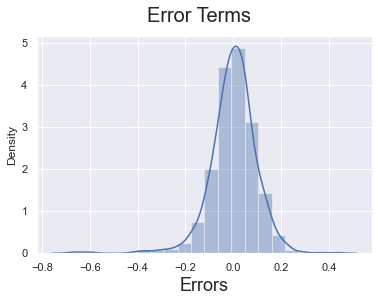

In [73]:
# checking by histogram of the error terms on training dataset
fig = plt.figure()
res=y_train - y_train_pred
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

- Above histogram is showing gaussian distribution of errors, So it is okay.

##### Checking by plot of prediction vs predicted sale price (with Lasso)

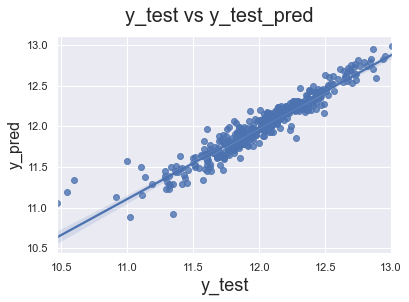

In [74]:
# Plotting y_test vs y_pred to have a glance at distribution.
fig = plt.figure()
sns.regplot(x=(y_test),y=y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.show()

## Observations:
- We can see that Lasso model is more better as the difference between r2 scores of training and test data sets are leass as compare to that of ridge model.
- Optimal values of Lasso is 0.001 and that of Ridge is 10
- As per Lasso Model following are top ten important features for M/s Surprise Housing

|  Feature  |  Description  |
 |  ---  |  ---  |
 |  MSSubClass  |  Identifies the type of dwelling involved in the sale  |
 |  BsmtFullBath  |  Basement full bathrooms  |
 |  SaleType_Oth  |  Type of sale (other)  |
 |  Neighborhood_Edwards  |  Physical locations within Ames city limits (Edwards)  |
 |  OverallCond   | Rates the overall condition of the house  |
 |  MasVnrArea  |  Masonry veneer area in square feet  |
 |  Electrical_FuseF  |  Electrical system (Fuse_F)  |
 |  MSZoning_RH  |  Identifies the general zoning classification of the sale. (Residential High Density)  |
 |  1stFlrSF  | First Floor square feet |
 |  MSZoning_RM   | Identifies the general zoning classification of the sale. (Residential Medium Density) |


#### When the market value of the property is lower than the Predicted Sale Price, its the time to buy.


##  Subjective questions 1:

**What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?**

In [75]:
lasso = Lasso(alpha=0.002)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print("r2_score on train data using Lasso regression:",r2_score(y_true=y_train,y_pred=y_train_pred))
print("r2_score on test data using Lasso regression::",r2_score(y_true=y_test,y_pred=y_test_pred))

r2_score on train data using Lasso regression: 0.9103332238822941
r2_score on test data using Lasso regression:: 0.9039626087836939


In [76]:
lasso_coeff.sort_values(by='Coeff',ascending=False).head(10)

Feature      Coeff
0              MSSubClass  11.775817
13           BsmtFullBath   0.124241
203          SaleType_Oth   0.093989
50   Neighborhood_Edwards   0.091828
4             OverallCond   0.083144
5              MasVnrArea   0.053747
166      Electrical_FuseF   0.053152
29            MSZoning_RH   0.051723
9                1stFlrSF   0.046500
31            MSZoning_RM   0.044126

**If we increase the Alpha value by double i.e. 0.002 in Lasso, the test score have increased by 0.0018. Test score is 0.9129 with alpha value is 0.9129 and 0.9111 with alpha value 0.001. **and the most important predictor variables after the change is implemented is as mentioned above**

In [77]:
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print("r2_score on train data using Ridge regression:",r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print("r2_score on train data using Ridge regression:",r2_score(y_test,y_pred_test))

r2_score on train data using Ridge regression: 0.9271022532039753
r2_score on train data using Ridge regression: 0.9129141322001608


In [78]:
ridge_coeff.sort_values(by='Coeff',ascending=False).head(10)

Feature      Coeff
0              MSSubClass  11.793927
50   Neighborhood_Edwards   0.090038
66    Neighborhood_Timber   0.072070
13           BsmtFullBath   0.069639
4             OverallCond   0.066803
166      Electrical_FuseF   0.063713
70        Condition1_PosA   0.057686
29            MSZoning_RH   0.052771
5              MasVnrArea   0.052128
31            MSZoning_RM   0.048665

**If we increase the Alpha value 20 in ridge Model, the test score have increased by 0.006 i.e. with aplha = 10 test score is 0.9123 and with alpha = 20, the test score is 0.9129 **and the most important predictor variables after the change is implemented is as mentioned above**

## Question 3:

**After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?**

In [79]:
Lasso_sort=lasso_coeff.sort_values(by='Coeff',ascending=False).head(5)
Lasso_sort

Feature      Coeff
0              MSSubClass  11.775817
13           BsmtFullBath   0.124241
203          SaleType_Oth   0.093989
50   Neighborhood_Edwards   0.091828
4             OverallCond   0.083144

In [80]:
X_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=210)

In [81]:
# we will drop the top five features
print(X_train.shape)
columns_to_be_dropped = ['MSSubClass','BsmtFullBath',"SaleType_Oth","Neighborhood_Edwards","OverallCond"]
X_train.drop(axis=1,labels=columns_to_be_dropped,inplace=True)
X_train.shape

(1000, 210)


(1000, 205)

In [82]:
# list of alphas to tune - 
# first we will tune aplha following approximately logarithimc scale

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200, 300, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            


model_cv.fit(X_train, y_train) 

print(model_cv.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'alpha': 0.001}


In [83]:
# lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 
#Predict the R-squared value for Train data

Lasso(alpha=0.001)

In [84]:
mapodel_parameter = list(lasso.coef_)
model_parameter.insert(0,lasso.intercept_)
cols = X_train.columns
cols.insert(0,'constant')
lasso_coef = pd.DataFrame(list(zip(cols,model_parameter)))
lasso_coef.columns = ['Feaure','Coef']

In [85]:
lasso_coef.sort_values(by='Coef',ascending=False).head(10)

Feaure       Coef
1               LotArea  11.793927
0           LotFrontage  11.725284
51   Neighborhood_NAmes   0.090038
67      Condition1_PosN   0.072070
14         BedroomAbvGr   0.069639
5            BsmtFinSF2   0.066803
167      KitchenQual_Gd   0.063713
71      Condition1_RRNn   0.057686
30         LotShape_IR3   0.052771
6           TotalBsmtSF   0.052128

__Thank_You__